# Section 1. Intro to Pandas

So far, we have used Python lists as well as Numpy arrays to store and manipulate data, each of which have their place in a simple Python program. But there's an excellent (and very popular) Python package called Pandas that greatly facilitates handling comma separated value (CSV) files and other types of data files. The basic tool in Pandas is the DataFrame, which you can think of as a large table with built-in functions to process rows and columns, read and write to many different formats on disk, and interact with other DataFrames. One key advantage of pandas over other types of data storage is that it can easily handle data of many different types, including strings and numbers.

## 1.1 Getting Started

First things first, we need to import the package. We should also import NumPy for other useful functions and matplotlib for when we plot
```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.1.1 The DataFrame

There are many ways to create DataFrames in Pandas. Here, we will use one method that involves lists. In this case, each row in the DataFrame starts as its own list, much like with a NumPy 2D array.

First, let's define some familiar looking Solar System data.

```
planets = [['Mercury', 0.0553, 0.4, 0],
           ['Venus', 0.815, 0.7, 0],
           ['Earth', 1.0, 1.0, 1],
           ['Mars', 0.107, 1.5, 2],
           ['Jupiter', 317.8, 5.2, 80],
           ['Saturn', 95.2, 9.5, 83],
           ['Uranus', 14.5, 19.2, 27],
           ['Neptune', 17.1, 30.1, 14]]

colnames = ['Name','Mass','Distance','N_moons']
# Units: None, Earth Masses, AU, None
```

Take note of a few things here. 

First, unlike in NumPy arrays, where you can only have one data type (usually int or float), each row in the above table mixes three different types of data: string, float, and int. This is one of the advantages of Pandas: different columns are allowed (and encouraged) to have different datatypes, depending on your needs.

Second, notice that the code above uses a second list to create names for the columns. This is a huge feature of the design philosophy of the DataFrame. While a NumPy 2D array can be thought of as a huge matrix of numbers, a DataFrame really is a table. 

Finally, note that code also included a comment with the units associated with this data. Units were not included in the column names to keep the column names short, which helps writing the code later on be much easier. As a reminder, it is good practice to label units in your code with comments to stay organized and to be able to share your code with others so they can easily understand it.

Now, let's make a dataframe named `df` from the lists named `planets` and print it out.
```
df = pd.DataFrame(planets, columns=colnames)
print(df)

```
In the second cell, try running just `df` to see how the output may look different. This distinction is only relevant when working in a Jupyter notebook and when datasets are small enough to read and look over in Python.
```
df
```

### 1.1.2 Accessing Rows and Cells

First, let's talk about how to access individual rows and cells. For this, we will use the method `df.loc`, where you can replace df with the name of your dataframe. 

You probably noticed in the previous example that each row is specified by an index. In the example above, we just had integer indices from 0 to 7. So, if we want to access the row for Earth, we can just execute
```
df.loc[2]
```
Note that some Pandas DataFrames you encounter may be indexed differently. For instance, the indices may not correspond to their row number at all. In fact, you can even find tables where the indices are strings. When using `df.loc` you must remember to use the label given.

We can illustrate this quite well by showing how to access a specific cell. We simply specify both the index (as above) and the column name. So, if we wanted to get the mass of Venus, for example, we'd execute
```
df.loc[2,'Mass']
```
Try this yourself below

Note that we can also use this functionality with `.loc` to 
change the values of individual cells, but in practice when working with data we didn't create ourselves, there is no reason to do so.

### 1.1.3 Accessing Columns

Accessing individual rows and cells is actually less useful than you'd think since each row only represents one data point. Usually, when we're using tables, we're actually more interested in the statistics of many data points. The DataFrame structure represents this, because it's very easy to get different columns. For example, if we want the different masses,
```
df['Mass']
```
If we wanted multiple columns, we enter a list of column names instead of just one, e.g.,
```
df[['Mass','Distance']]
```

Note that this is why it is best to keep column names short by including units in a comment rather than in the column name as mentioned above. Since we need to write out the column names, adding the units can make the code harder to parse.

### 1.1.4 df.values
When using some functions, like `plt.plot()`, we don't want the full Pandas DataFrame. Using `df.values` will extract the values and return a NumPy array.
```
df.values # returns a 2D array
df.loc[2].values # returns a 1D array of the third row
df['Mass'].values # returns a 1D array of the Mass column
```

## 1.2 Making Changes to a DataFrame
### 1.2.1 Adding New Columns from Data

Let's say we get more data from a different source. We want to add it to our DataFrame. We can do so like this.
```
radii = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88] # in Earth radii 

df['Radius'] = radii
```

One big note: **your list or list-like object with the new data must be in the same order as the rows in your DataFrame. If they aren't, your data will be incorrect. This is extremely important.**

Add this new column below. It will be used in the next section.

### 1.2.2 Adding New Columns from Other Columns

It's important to remember that columns are essentially NumPy arrays with extra stuff. As a result, we can do mathematical operations on columns just like we do with arrays. We can leverage this to create new columns. For example, we want to create a new column with the densities of each planet. Density is the ratio of the mass of an object over its volume, and we can calculate the densities by using the formula d = m / v.  Our DataFrame contains planetary mass in Earth masses and radius data in Earth radius. As a result, we'll convert the masses and radii to SI units, calculate the densities using those values, and add a column named `Density` to the DataFrame `df`.
```
m_e = 5.9722e24 # kg
r_e = 6.371e6 # m, using the average radius
df['Density'] = m_e*df['Mass']/((4/3)*np.pi*(r_e*df['Radius'])**3)
```

Now that you've done that, what do you notice about the densities of the outer planets versus the inner planets? Compare these densities to the densities of various materials in this [wikipedia page](https://en.wikipedia.org/wiki/Density#Densities). Which materials are these densities most similar to?

What you should find is that the inner planets are rocky, so their densities are more comparable to metals, while the gas giants have densities that are closer to that of water.

### 1.2.3 Practice Problem 1: Kepler's Law

Using Kepler's Third Law, make another column that corresponds to the orbital period for each planet **in years.** Once again, Keplers Third Law is 

$$T = 2\pi \sqrt{\frac{a^3}{G(M_1 + M_2)}}$$

For the case of solar system planets, you may make the approximation that $M_1 + M_2 \approx M_\odot \approx 2e30$ kg. 

You can calculate by hand how many seconds are in a year, but note a year technically has 365.25 days!

Finally, you'll need to know that 1 AU is defined as exactly 149597870700 m.

### 1.2.4 Practice Problem 2: Equilibrium Temperature

The [equilibrium temperature](https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature) of a planet is defined as the temperature at which the power supplied by its star (due to solar radiation) is equal to the power emitted by the planet (due to blackbody radiation). Without getting too much into the details, the formula (in units of Kelvin) is as follows:

$$ T_{\rm eq} =  \left( \frac{L (1 - A_B)}{16\sigma\pi a^2} \right)^{1/4}$$

Here, L is the luminosity of the Sun (3.828e26 Watts), a is the semimajor axis (same as the "distance" column), $\sigma =$ 5.67e-8 (SI units) is the Stefan-Boltzmann constant, and $A_B$ is something called the [Bond Albedo](https://en.wikipedia.org/wiki/Bond_albedo).

Your task:
1. Create a new column for the Bond albedo of each planet, taking the data from the linked wikipedia article
2. Create a new column for the equilibrium temperature using the formula above. 
3. Create a new column for the effective/surface temperature of each planet using the values listed below. 
4. Create a scatter plot of the predicted equilibrium temperature versus the actual surface temperature. Show the 1-to-1 line (that is, the line y=x) using a dotted line for comparison. Make sure to restrict the range of this dotted line so that your data is still easily interpretable! After reading the first linked wikipedia article, can you think of at least one reason why they may be different? (Hint: you've definitely learned about one of them in other science classes or the news)

```
Teff = [412.5, 737, 288, 215, 124.4, 95, 59.1, 59.3]
```
Values taken from de Pater and Lissauer (2010). Note Mercury's is the average of 100 and 725



## 1.3 Intermediate Pandas

### 1.3.1 Boolean Indexing with DataFrames

When we take a look at data, it can happen that we are only interested in a subset of the rows based on one or more conditions. Luckily for us, this is almost exactly identical to doing the same thing with NumPy arrays! The difference is that we use the column names instead of their indices. For example, let's get only the planets that have moons.

```
df[df['N_moons'] > 0]
```

Just like before, we can chain different things together. For example, let's get only the planets that have moons but are further than 5 au from the Sun.

```
df[(df['N_moons'] > 0) & (df['Distance'] > 5)]
```

As a reminder, here is a list of the logical operators you can use:

```
== # equal to
!= # not equal to
<= # less than or equal to
<  # less than
>= # greater than or equal to
>  # greater than

& # logical and
| # logical or
~ # logical not
```


### 1.3.2 df.iterrows()

There are extremely rare cases where you will find it is necessary to iterate over the rows of a dataframe. These cases should be extremely rare. In almost every instance, there is some way of doing this using vectorized functions. In fact, the official documentation has a warning against doing this:

> Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed [...].

In any case, there are times when this may be necessary. In those cases, we can use the function `df.iterrows()` which allows us to iterate over all the rows in the dataframe. In the following example
```
for i,row in df.iterrows():
    print(row['Name'],'has',row['N_moons'],'moons.')
```
In this example, `df.iterrows()` returns an index,series pair for each row in the dataframe. Since each row is returned as a Pandas Series, we can use the original column names to access the different columns of each row. Note for reference we could have done this same example in a completely vectorized way:
```
str_ser = df['Name']+' has '+ df['N_moons'].astype(str) + ' moons.'
print('\n'.join(str_col.values))
```
In the above example, I make a new Series by adding the different strings together. Notice the use of the `Series.astype(str)` function to turn the integers into strings. Then, I use the join function to turn the Series of strings into one long string, where the original strings are separated by a return character. Thus, we have reproduced the output of the previous for loop.

### 1.3.3 Using Other People's Data

Over this module we've been hinting at the fact that you will never create your own DataFrame from scratch in practical situations. Almost all data you analyze with Pandas will either be data you get from somewhere else or data that you create from some complicated simulation. In other words, you need to know how to take files of data and create a DataFrame out of it.

A common format for data is called a CSV file for comma separated values. In a CSV file, each row contains the same amount of numbers, each separated by a comma. It's possible to use other "separators" as well. A commonly used one is whitespace, where some number of whitespaces (whether tabs or spaces) are used to separate different values in a row.

One of the main ways to read such files in Pandas is to use `pd.read_csv()`.

```
filename = 'path/to/file' # whatever the path to the file is

df = pd.read_csv(filename,...)
```
There are several parameters for this function that merit discussion.


*   `sep`/`delimiter`: The separator to use. Defaults to `sep=','`. Another useful one is whitespace, which would be `sep='\s+'`.
*   `header`: Often, files will include a first row with a list of names. In this is the case, `header=0` will adopt those column names. 
*   `names`: If your file doesn't contain a header (or you don't like the names provided), you can supply your own list of names. If you pass a header in the option above, this parameter will be overwritten, so remember to use either `header` or `names`.
*   `usecols`: If you don't want to read all the columns of a file (e.g. because of memory constraints) then you can pass a subset of columns to use. For example, if you wanted the first two and the fifth column only, then you'd use `usecols=[0,1,4]`.
*   `comment`: It's common for files to be prepended with some number of lines telling you what the file contains and additional details. These lines will begin with some character or combination of characters so that when the computer reads them it's easy to tell which lines to ignore. One common choice is `comment=#`.

Another important thing to keep in mind: the real world is typically much messier than we'd like. As a result, we don't always have all the information we want. So, it's common for real world data to have a lot of missing values. `read_csv()` will take care of this by filling in the missing values with `np.nan`. Consider these two rows from the data you'll use in the challenge problem:
```
324,EPIC 201427007 b,EPIC 201427007,1,1,1,Transit,2021,0.72091000,,1.500,0.134,,,,,,0,5633.00,0.94,,706.3910000
325,EPIC 201497682 b,EPIC 201497682,1,1,1,Transit,2019,2.13174000,,0.692,0.062,,,,,,0,,,0.78,253.0260000
```
Ignoring what these mean for now, notice that in the middle of both rows, there are a lot of commas in a row. These correspond to five columns where either the data doesn't exist for one reason or another. Also, notice that the second row is shorter because it's missing two more values than the first row. When values are missing, they will be filled in with `np.nan`.

### 1.3.4 Practice Problem 3: Binaries

Redo the problem from the NumPy section, but this time using Pandas. This time, the file will be a csv.

Also, additional tasks:
1. Make a scatter plot of mass vs k-type
2. Histograms of binary total mass, mass ratio (smaller mass over larger mass), and the masses of all the individual stars.
3. Histogram of eccentricities.
4. Scatter plot of the total mass vs the mass ratio.
5. Anything else you may think of.

In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/binaries.csv

### 1.3.5 Practice Problem 4: Potentially Hazardous Asteroids Data



In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/PHA_data.csv

In this problem, you will look at a dataset describing Potentially Hazardous Asteroids (PHAs) which are cataloged by the Minor Planets Center, hosted at the Harvard-Smithsonian Center for Astrophysics. You will find out why these are called Potentially Hazardous.

The original version of this data can be found [here](https://www.minorplanetcenter.net/data). The version supplied here has been reformatted for easier reading by `pd.read_csv()`. Note that the Center updates this data frequently, so the version here, made in early 2023, may be wildly inaccurate.

The first thing to do is to open the file and look at the contents. Notice that the first line of the file contains a description of the columns. Therefore, it would be a good idea to use the keyword argument `header=0`. Similarly, the first column of data is an index, so you can choose to use the keyword argument `index=0`. Finally, the last column contains a bunch of dates. In order to make sure pandas parses this data correctly, we can use the keyword argument `parse_dates=['Date of last observation']`. In the cell below, put this all together and read the file using `pd.read_csv()`. Print the dataframe and inspect it to make sure nothing is out of the ordinary. Report the total number of rows.

In [5]:
file_path = 'data/PHA_data.csv'
df = pd.read_csv(file_path, parse_dates=['Date of last observation'],header=0,index_col=0)

In [6]:
df

,Designation,Abs Mag,Slope Param,Epoch,Mean anom (deg),Argument of Perihelion (deg),Longitude of Ascending Node (deg),Inclination to Ecliptic (deg),Eccentricity,Mean daily motion (deg/day),Semimajor Axis (AU),Reference,N observation,N oppositions,Readable Designation,Date of last observation
0,01566,16.50,0.15,K232P,352.54819,31.44177,87.95165,22.79955,0.826869,0.880439,1.078127,MPO719076,1330,39,(1566) Icarus,2022-08-01
1,01620,15.32,0.15,K232P,224.05341,276.96118,337.17213,13.33636,0.335535,0.708921,1.245673,E2023-C50,5375,40,(1620) Geographos,2023-02-07
2,01862,16.11,0.09,K232P,281.24750,286.05510,35.56144,6.35319,0.559874,0.552634,1.470656,E2023-C29,2204,34,(1862) Apollo,2023-02-01
3,01981,15.28,0.15,K232P,9.03147,267.81921,356.85489,39.82990,0.649989,0.416223,1.776582,MPO691531,1052,25,(1981) Midas,2021-10-20
4,02101,18.72,0.15,K232P,0.32752,43.63171,349.47384,1.32170,0.764346,0.384249,1.873819,MPO727488,134,11,(2101) Adonis,2020-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,z4433,20.58,0.15,K232P,134.23024,247.33996,68.12942,18.21503,0.455263,0.535376,1.502092,MPO732367,187,6,(614433) 2009 KK,2022-12-15
2326,z4470,18.39,0.15,K232P,256.53119,336.90766,0.16183,6.72972,0.594930,0.271636,2.361263,MPO732367,430,5,(614470) 2009 ST19,2021-01-06
2327,z8350,19.96,0.15,K232P,312.19876,78.86174,163.38127,7.92586,0.473430,0.508819,1.553914,E2023-BF5,227,6,(618350) 2021 PS2,2023-01-27
2328,z9106,20.11,0.15,K232P,110.97642,294.87859,317.20798,1.19960,0.574266,0.463054,1.654685,MPO723643,477,6,(619106) 2005 SQ,2022-10-02


Now that you've read in the data, we can see where these objects get their name. Below, add two columns, one for the pericenter distance and one for the apocenter distance from the Sun in AU. Name these columns `'peri'` and `'apo'`. The equation for pericenter is $r_{\rm peri} = a(1-e)$ and for apocenter, $r_{\rm apo} = a(1+e)$. Note that the semimajor axis in the file is already in AU, so there is no unit conversion needed.

In [7]:
df['peri'] = df['Semimajor Axis (AU)']*(1 - df['Eccentricity'])
df['apo'] = df['Semimajor Axis (AU)']*(1 + df['Eccentricity'])

Next, make two histograms, one for the pericenter and one for the apocenter of each object. Add additional lines using `plt.axvline()` representing the semimajor axis of the inner planets. Optionally, also add dashed lines around these solid lines corresponding to the pericenter and apocenter of the inner planets and Jupiter. If you can, add shading to the region in between the dashed lines using `plt.axvspan`.

The documentation of `plt.axvline()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline). The documentation of `plt.axvspan()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html). Here's an example for how you'd do this for Mars. Note I am shading the region but without the dashed lines for the pericenter and apocenter. When doing this for multiple planets, it would be easier to do so with a for loop.
```
Mars_SMA = 1.524 # AU
Mars_ecc = 0.0934

Mars_peri = Mars_SMA*(1 - Mars_ecc)
Mars_apo = Mars_SMA*(1 + Mars_ecc)

plt.axvline(x = Mars_SMA, color='g')
plt.axvspan(Mars_peri, Mars_apo, facecolor='g', alpha=0.5)
```

Do you notice anything potentially alarming? In order to make this a more quantitative claim, how many objects in the dataset have a pericenter smaller than Earth's semimajor axis AND an apocenter larger than Earth's semimajor axis? Repeat this for each of the inner planets and Jupiter.

You should notice that some of these objects do not seem to have Earth-crossing orbits. Why do you think they're on this list?

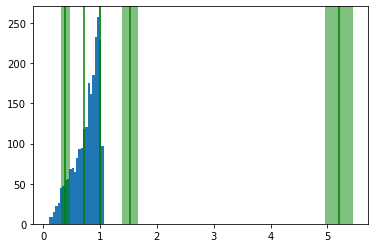

In [12]:
plt.hist(df['peri'].values, bins=int(0.5*np.sqrt(len(df.index))))

smas = np.array([0.39, 0.72, 1, 1.5273, 5.2])
eccs = np.array([0.2, 0.007, 0.017, 0.093, 0.048])

for a,e in zip(smas,eccs):
    peri = a*(1-e)
    apo = a*(1+e)
    plt.axvline(x = a, color='g')
    plt.axvspan(peri, apo, facecolor='g', alpha=0.5)

plt.xlabel('Pericenter (AU)')

Make an additional histogram showing the dates of last observation. Since this is datetime data, which pandas handles internally quite efficiently, you can use the method `df['Date of Last Observation'].hist()` to do this quickly. Look at the range on the x-axis. Is this concerning? 

In order to make a quantitative claim, how many of these have not been observed within the past 1, 5, and 10 years?

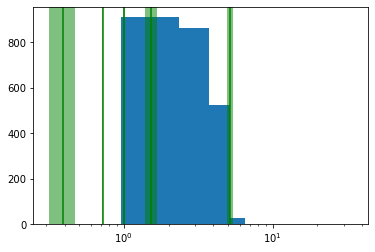

In [14]:
plt.hist(df['apo'].values, bins=int(0.5*np.sqrt(len(df.index))))
plt.xscale('log')

smas = np.array([0.39, 0.72, 1, 1.5273, 5.2])
eccs = np.array([0.2, 0.007, 0.017, 0.093, 0.048])

for a,e in zip(smas,eccs):
    peri = a*(1-e)
    apo = a*(1+e)
    plt.axvline(x = a, color='g')
    plt.axvspan(peri, apo, facecolor='g', alpha=0.5)

plt.xlabel('Apocenter (AU)')


***Optional***

We can make a better version of the first two histograms in a way that's visually more intuitive. For the purposes of the code below, I'll assume you named your Dataframe `df`.

First, let's reorder the rows to sort by pericenter and apocenter values in ascending order.
```
df = df.sort_values(by=['peri', 'apo'])
```
Next, since the dataset is so large, let's select only a subset of the rows to visualize. However, we still want to show the whole extent of the dataset, so choosing the first chunk of the data would not be a good option. Instead, let's choose every nth row. For this case, I'll use `n=40`, though you should feel free to play around with this number. I will make this a variable so it is easy to change later.
```
nth_row = 40
df_reduced = df.iloc[::nth_row, :]
```
One more step. In order to make our plot look nice, let's also reset the index. Optionally, you can add the keyword argument `drop=True`. If you don't (I will not), then your new dataframe will add the old indices as a new column.
```
df_reduced = df_reduced.reset_index()
```
Now, we can get to plotting. What we will do is use the index value as the y-value so that each object gets its own line. For the x-values, we will use the semimajor axis. We will also include the extent of the orbit by plotting the pericenter and apocenter using errorbar.
```
xdata = df_reduced['Semimajor Axis (AU)'].values
ydata = df_reduced.index
xerr_low = xdata - df_reduced['peri'].values
xerr_high = df_reduced['apo'].values - xdata
xerr = (xerr_low, xerr_high)
plt.errorbar(xdata, ydata, xerr = xerr, linestyle='')
```
As before, also added some vertical lines and shaded regions representing the inner planets.

Text(0, 0.5, 'Arbitrary Order (Could get rid of these labels)')

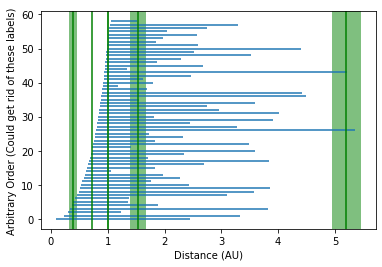

In [16]:
df = df.sort_values(by=['peri','Semimajor Axis (AU)'])
nth_row = 40
df_reduced = df.iloc[::nth_row, :]
df_reduced = df_reduced.reset_index()

xdata = df_reduced['Semimajor Axis (AU)'].values
ydata = df_reduced.index
xerr_low = xdata - df_reduced['peri'].values
xerr_high = df_reduced['apo'].values - xdata
xerr = (xerr_low, xerr_high)
plt.errorbar(xdata, ydata, xerr = xerr, linestyle='')

smas = np.array([0.39, 0.72, 1, 1.5273, 5.2])
eccs = np.array([0.2, 0.007, 0.017, 0.093, 0.048])

for a,e in zip(smas,eccs):
    peri = a*(1-e)
    apo = a*(1+e)
    plt.axvline(x = a, color='g')
    plt.axvspan(peri, apo, facecolor='g', alpha=0.5)

plt.xlabel('Distance (AU)')
plt.ylabel('Arbitrary Order (Could get rid of these labels)')